For NxN grid points, enter the value of N = 41
9.957626041423093e-06 	 1813


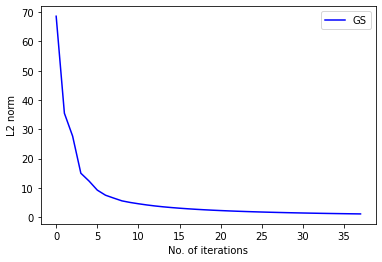

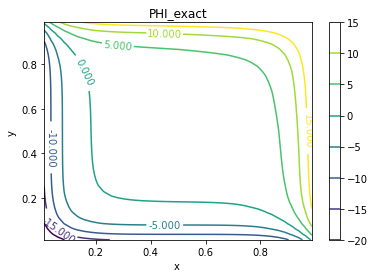

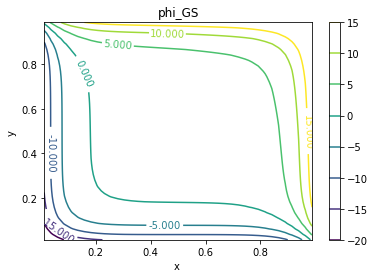

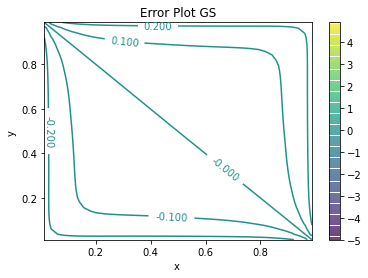

In [1]:
#Gauss Seidel
import numpy
import math
import matplotlib.pyplot as plt
from numpy import linalg as al
#Uniform grids del(x)=del(y)=h
# For NxN grid points
N =int(input("For NxN grid points, enter the value of N = "))
#Including Ghost cells
N= N+2    
h=(1-0)/(N-2)
#Saving Coefficients East=cE, West=cW, North=cN, SouthcS, Centre=cC
cC= -2*(2/h**2)
cW=1/h**2
#Uniform grids
cE=cN=cS=cW 
phi = numpy.zeros(shape=(N,N),dtype=float)
phi1 = numpy.zeros(shape=(N,N),dtype=float)
L= 1
L2_GS=[]
tolerance= 10e-6  #Tolerance
I = 0       #Iteration count
def S(x,y):
    
    return 2*math.sinh(10*(x-0.5)) + 40* (x-0.5)*math.cosh(10*(x-0.5)) \
    + 100*((x-0.5)**2)*math.sinh(10*(x-0.5)) \
    + 2*math.sinh(10*(y-0.5))+40*(y-0.5)*math.cosh(10*(y-0.5)) \
    + 100*((y-0.5)**2)*math.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*math.exp(2*x*y)

BH = lambda y: 0.25* math.sinh(-5) +  math.sinh(10*(y-0.5))*(y-0.5)**2 +1
TH = lambda y: 0.25* math.sinh(5) + (y-0.5)**2 * math.sinh(10*(y-0.5))+math.exp(2*y)
LV = lambda x: 0.25* math.sinh(-5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+1
RV = lambda x: 0.25* math.sinh(5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+math.exp(2*x)
while (L>tolerance):
    
    for j in range(1,N-1):
        for i in range(1,N-1):
            x=h*(i-1/2)
            y=h*(j-1/2)                    
            phi1[i,j]= (S(x,y)-cW*phi1[i-1,j]-cS*phi1[i,j-1]-cE*phi[i+1,j]-cN*phi[i,j+1])/cC
            

    for i in range(1,N-1):
        phi1[i,0]=2*BH(h*(i-1/2))-phi[i,1]
        phi1[i,N-1]=2*TH(h*(i-1/2))-phi[i,N-2]
    for j in range(1,N-1):
        phi1[0,j]=2*LV(h*(j-1/2))-phi[1,j]
        phi1[N-1,j]=2*RV(h*(j-1/2))-phi[N-2,j]
            
    I=I+1
    L = al.norm(phi[1:N-1,1:N-1]-phi1[1:N-1,1:N-1],2)
    L2_GS.append(L)
    phi=numpy.copy(phi1)
print(L,'\t',I)

#Plot for L2 norm vs Iterations
I = list(range(0,N-5))  
plt.plot(I, L2_GS[2:N-3], color='blue') 
plt.legend(['GS'])
plt.xlabel('No. of iterations')
plt.ylabel('L2 norm')
plt.show()


#Plot for Exact phi
x_g = numpy.linspace(0.5*h, 1-0.5*h, N-2)
y_g = numpy.linspace(0.5*h, 1-0.5*h, N-2)
x, y = numpy.meshgrid(x_g, y_g)
PHI_exact = (x-0.5)**2*numpy.sinh(10*(x-0.5))+(y-0.5)**2*numpy.sinh(10*(y-0.5))+numpy.exp(2*x*y)
fig,ax=plt.subplots(1,1)
levels = numpy.arange(-20,20,5)
cp = ax.contour(x, y, PHI_exact,levels=levels)
ax.clabel(cp, inline=True,fontsize=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('PHI_exact')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()
  
#Plot for phi using GS

PHI_GS = phi1[1:N-1,1:N-1]
fig,ax=plt.subplots(1,1)
levels = numpy.arange(-20,20,5)
cp = ax.contour(x, y, PHI_GS,levels=levels)
ax.clabel(cp, inline=True,fontsize=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('phi_GS')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show() 
#Plot for Error using GS   
Error_GS = PHI_exact- PHI_GS
fig,ax=plt.subplots(1,1)
lev = numpy.arange(-5,5,0.1)
ploterr = ax.contour(x, y, Error_GS,levels=lev)
fig.colorbar(ploterr)
ax.clabel(ploterr, inline=True,fontsize=10)
plt.title('Error Plot GS')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()


                

[ 0.14877589  0.75612053 -1.00188324  2.25141243]
[ 0.14877589  0.75612053 -1.00188324  2.25141243]
[3. 1. 3.]
For NxN grid points, enter the value of N = 41
[[  0.         -66.08622263 -56.61997243 ... -13.58323814  -4.11698795
    0.        ]
 [-66.08622263  22.0717734    5.88269791 ...  11.80522964  44.17496274
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [-13.58323814   0.           0.         ...   0.           0.
   72.30392915]
 [ -4.11698795   0.           0.         ...   0.           0.
   82.49022564]
 [  0.           8.16893311  17.74315614 ...  72.30392915  82.49022564
    0.        ]]
[[  0.         -66.08622263   0.         ...   0.           0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           

[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243

    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.0862

[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243

    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.0862

[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243

    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.0862

[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243

[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243

    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.0862

    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.0862

[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [-13.58323814   0.           0.         ...   0.           0.
   72.30392915]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
[[  0.         -66.08622263 -56.61997243 ... -13.58323814   0.
    0.        ]
 [-66.08622263   0.           0.         ...   0.           0.
    8.16893311]
 [-56.61997243   0.           0.         ...   0.           0.
   17.74315614]
 ...
 [-13.58323814   0.           0.         ...   0.           0.
   72.30392915]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           8.16893311  17.74315614 ...  72.30392915   0.
    0.        ]]
For NxN grid points, enter the value of 

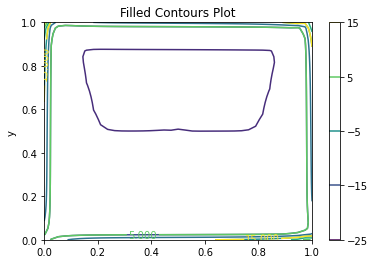

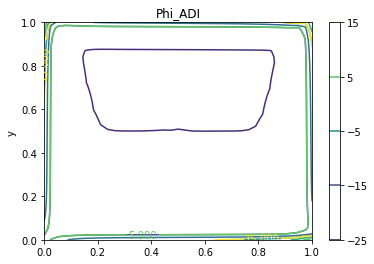

In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[31]:


import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as al
#Thomas algorithm solver
def TDMA(a, b, c, d):
#a is lower diagonal,b is diagnonal,c is upper diagonal, d is the RHS value
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(numpy.array, (a, b, c, d)) 
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
            
    Q = bc
    Q[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        Q[il] = (dc[il]-cc[il]*Q[il+1])/bc[il]

    return Q
A = numpy.array([[10,2,0,0],[3,10,4,0],[0,1,7,5],[0,0,3,4]],dtype=float)   

a = numpy.array([3.,1,3]) 
b = numpy.array([10.,10.,7.,4.])
c = numpy.array([2.,4.,5.])
d = numpy.array([3,4,5,6.])

print(TDMA(a, b, c, d))

#compare against numpy linear algebra library
print(numpy.linalg.solve(A, d))
print(a)


# In[111]:



#Uniform grids del(x)=del(y)=h
# For NxN grid points
N= int(input("For NxN grid points, enter the value of N = "))
h=(1-0)/(N-2)
#Saving Coefficients East=cE, West=cW, North=cN, South=cS, Centre=cC
cC= -2*(2/h**2)
cW=1/h**2
cE=cN=cS=cW #Uniform grids
phi = numpy.zeros(shape=(N,N),dtype=float)
phi1 = numpy.zeros(shape=(N,N),dtype=float)
d=[0]*(N-2)  #d is the RHS value
a=[cW]*(N-3) #a is lower diagonal
b=[cC]*(N-2) #b is diagnonal
c=[cE]*(N-3) #c is upper diagonal
tol= 10e-6  #Tolerance
I = 0       #Iteration count
L2= 10e-5
LV = lambda x,y: 0.25* math.sinh(-5) + (y-0.5)**2 * math.sinh(10*(y-0.5))+1
RV = lambda x,y: 0.25* math.sinh(5) + (y-0.5)**2 * math.sinh(10*(y-0.5))+math.exp(2*y)
BH = lambda x,y: 0.25* math.sinh(-5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+1
TH = lambda x,y: 0.25* math.sinh(5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+math.exp(2*x)
        
#Updating Ghost Cells
for i in range(1,N-1):
    for j in range(1,N-1):
        x=h*(i-1/2)
        y=h*(j-1/2)            
        phi[0,j]=2*LV(0,y)-phi[1,j]
        phi[N-1,j]=2*RV(1,y)-phi[N-2,j]
        phi[i,0]=2*BH(x,0)-phi[i,j]
        phi[i,N-1]=2*TH(x,1)-phi[i,N-2]
#Row Sweep
for j in range(1,N-1):
    for i in range(1,N-1):
        x=h*(i-1/2)
        y=h*(j-1/2)
        S = 2 * math.sinh(10*(x-0.5)) 
        +40*(x-0.5)*math.cosh(10*(x-0.5))
        +100*(math.sinh(10*(x-0.5)))*(x-0.5)**2
        +2*math.sinh(10*(y-0.5))
        +40*(y-0.5)*math.cosh(10*(y-0.5))
        +100*(y-0.5)**2*math.sinh(10*(y-0.5))
        +4*(x**2+y**2)*math.exp(2*x*y)
        d[j-1]= S-cN*phi[i,j+1]-cS*phi[i,j-1]
        d[0]= S-cN*phi[i,j+1]-cS*phi[i,j-1]-cW*phi[i-1,j]    
        d[N-3]=S-cN*phi[i,j+1]-cS*phi[i,j-1]-cE*phi[i+1,j]
phi[1,1:N-1]=TDMA(a, b, c, d)
print(phi)
#Column Sweep
for i in range(1,N-1):
    for j in range(1,N-1):
        x=h*(i-1/2)
        y=h*(j-1/2)
        S = 2 * math.sinh(10*(x-0.5)) 
        +40*(x-0.5)*math.cosh(10*(x-0.5))
        +100*(math.sinh(10*(x-0.5)))*(x-0.5)**2
        +2*math.sinh(10*(y-0.5))
        +40*(y-0.5)*math.cosh(10*(y-0.5))
        +100*(y-0.5)**2*math.sinh(10*(y-0.5))
        +4*(x**2+y**2)*math.exp(2*x*y)
        d[i-1]= S-cE*phi[i+1,j]-cW*phi[i-1,j]
        d[0]= S-cE*phi[i+1,j]-cW*phi[i-1,j]-cS*phi[i,j-1]    
        d[N-3]=S-cE*phi[i+1,j]-cW*phi[i-1,j]-cN*phi[i,j+1]
phi[1:N-1,1]=TDMA(a, b, c, d)
phi=phi1
                
'''print(a,'\n',b,'\n',c,'\n',d,'\n',phi)
phi[1,1:N-1]=TDMA(a, b, c, d)
print(phi)
        
        
S = 2 * math.sinh(10*(x-0.5)) 
            +40*(x-0.5)*math.cosh(10*(x-0.5))
            +100*(math.sinh(10*(x-0.5)))*(x-0.5)**2
            +2*math.sinh(10*(y-0.5))
            +40*(y-0.5)*math.cosh(10*(y-0.5))
            +100*(y-0.5)**2*math.sinh(10*(y-0.5))
            +4*(x**2+y**2)*math.exp(2*x*y)
        phi1[i,j]= (S-cW*phi[i-1,j]-cS*phi[i,j-1]-cE*phi[i+1,j]-cN*phi[i,j+1])/cC
        
for i in range(1,N-1):
    for j in range(1,N-1):
        x=h*(i-1/2)
        y=h*(j-1/2)'''
        
        
        


# In[39]:


'''a=[5]*10
a[5]=4
a'''


# In[37]:


a=[cW]*(N-3) #a is lower diagonal,b is diagnonal,c is upper diagonal, d is the RHS value
b=[cC]*(N-2)
c=[cE]*(N-3)
a,b,c
        


# In[103]:


d=[5]*10
d[0]=4
d[10-1]=7
d


# In[53]:


for i in range(1,N-2):
    for j in range(1,N-2):
        x=h*(i-1/2)
        y=h*(j-1/2)            
        phi[0,j]=2*LV(0,y)-phi[1,j]
        phi[N-1,j]=2*RV(1,y)-phi[N-2,j]
        phi[i,0]=2*BH(x,0)-phi[i,j]
        phi[i,N-1]=2*TH(x,1)-phi[i,N-2]
        S = 2 * math.sinh(10*(x-0.5)) 
        +40*(x-0.5)*math.cosh(10*(x-0.5))
        +100*(math.sinh(10*(x-0.5)))*(x-0.5)**2
        +2*math.sinh(10*(y-0.5))
        +40*(y-0.5)*math.cosh(10*(y-0.5))
        +100*(y-0.5)**2*math.sinh(10*(y-0.5))
        +4*(x**2+y**2)*math.exp(2*x*y)
        print(phi)


# In[124]:


from numpy import linalg as al
#Uniform grids del(x)=del(y)=h
# For NxN grid points
N= int(input("For NxN grid points, enter the value of N = "))
h=(1-0)/(N-2)
#Saving Coefficients East=cE, West=cW, North=cN, South=cS, Centre=cC
cC= -2*(2/h**2)
cW=1/h**2
cE=cN=cS=cW #Uniform grids
phi = numpy.zeros(shape=(N,N),dtype=float)
phi1 = numpy.zeros(shape=(N,N),dtype=float)
d=[0]*(N-2)  #d is the RHS value
a=[cW]*(N-3) #a is lower diagonal
b=[cC]*(N-2) #b is diagnonal
c=[cE]*(N-3) #c is upper diagonal
e=1
er=[]
tol= 10e-6  #Tolerance
I = 0       #Iteration count
L2=10e-5
LV = lambda x,y: 0.25* math.sinh(-5) + (y-0.5)**2 * math.sinh(10*(y-0.5))+1
RV = lambda x,y: 0.25* math.sinh(5) + (y-0.5)**2 * math.sinh(10*(y-0.5))+math.exp(2*y)
BH = lambda x,y: 0.25* math.sinh(-5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+1
TH = lambda x,y: 0.25* math.sinh(5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+math.exp(2*x)
while (e>tol):
    
    for P in range(1,N-1):

        #Updating Ghost Cells
        for i in range(1,N-1):
            for j in range(1,N-1):
                x=h*(i-1/2)
                y=h*(j-1/2)            
                phi[0,j]=2*LV(0,y)-phi[1,j]
                phi[N-1,j]=2*RV(1,y)-phi[N-2,j]
                phi[i,0]=2*BH(x,0)-phi[i,j]
                phi[i,N-1]=2*TH(x,1)-phi[i,N-2]
        #Row Sweep

        for j in range(1,N-1):
            x=h*(P-1/2)
            y=h*(j-1/2)
            S = 2 * math.sinh(10*(x-0.5)) 
            +40*(x-0.5)*math.cosh(10*(x-0.5))
            +100*(math.sinh(10*(x-0.5)))*(x-0.5)**2
            +2*math.sinh(10*(y-0.5))
            +40*(y-0.5)*math.cosh(10*(y-0.5))
            +100*(y-0.5)**2*math.sinh(10*(y-0.5))
            +4*(x**2+y**2)*math.exp(2*x*y)
            d[j-1]= S-cN*phi[P,j+1]-cS*phi1[P,j-1]
            d[0]= S-cN*phi[P,j+1]-cS*phi1[P,j-1]-cW*phi1[P-1,j]    
            d[N-3]=S-cN*phi[P,j+1]-cS*phi1[P,j-1]-cE*phi1[P+1,j]
        phi1[P,1:N-1]=TDMA(a, b, c, d)
        phi[P,1:N-1]=numpy.copy(phi1[P,1:N-1])
        for i in range(1,N-1):
            for j in range(1,N-1):
                x=h*(i-1/2)
                y=h*(j-1/2)            
                phi[0,j]=2*LV(0,y)-phi[1,j]
                phi[N-1,j]=2*RV(1,y)-phi[N-2,j]
                phi[i,0]=2*BH(x,0)-phi[i,j]
                phi[i,N-1]=2*TH(x,1)-phi[i,N-2]


        #Column Sweep

        for i in range(1,N-1):
            x=h*(i-1/2)
            y=h*(P-1/2)
            S = 2 * math.sinh(10*(x-0.5)) 
            +40*(x-0.5)*math.cosh(10*(x-0.5))
            +100*(math.sinh(10*(x-0.5)))*(x-0.5)**2
            +2*math.sinh(10*(y-0.5))
            +40*(y-0.5)*math.cosh(10*(y-0.5))
            +100*(y-0.5)**2*math.sinh(10*(y-0.5))
            +4*(x**2+y**2)*math.exp(2*x*y)
            d[i-1]= S-cE*phi[i+1,P]-cW*phi1[i-1,P]
            d[0]= S-cE*phi[i+1,P]-cW*phi1[i-1,P]-cS*phi1[i,P-1]    
            d[N-3]=S-cE*phi[i+1,P]-cW*phi1[i-1,P]-cN*phi1[i,P+1]
        phi1[1:N-1,P]=TDMA(a, b, c, d)
        phi[1:N-1,P]=numpy.copy(phi1[1:N-1,P])
    e = al.norm(phi1-phi,2)
    e = al.norm(phi[1:N-1,1:N-1]-phi1[1:N-1,1:N-1],2)
    er.append(e)
    I=I+2
    phi=numpy.copy(phi1)

print(phi1,I)
xlist = numpy.linspace(0, 1.0, N-2)
ylist = numpy.linspace(0, 1.0, N-2)
x, y = numpy.meshgrid(xlist, ylist)
Z = phi1[1:N-1,1:N-1]
fig,ax=plt.subplots(1,1)
cp = ax.contour(x, y, Z)
levels = numpy.arange(-25,25,10)
cp = ax.contour(x, y, Z,levels=levels)
ax.clabel(cp, inline=True,fontsize=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show() 
    


# In[126]:


xlist = numpy.linspace(0, 1.0, N-2)
ylist = numpy.linspace(0, 1.0, N-2)
x, y = numpy.meshgrid(xlist, ylist)
Z = phi1[1:N-1,1:N-1]
fig,ax=plt.subplots(1,1)
cp = ax.contour(x, y, Z)
levels = numpy.arange(-25,25,10)
cp = ax.contour(x, y, Z,levels=levels)
ax.clabel(cp, inline=True,fontsize=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Phi_ADI')
#ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show() 
    


# In[ ]:



For NxN grid points, enter the value of N = 41
9.98978888538923e-06 	 3317


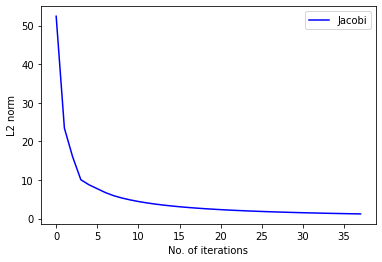

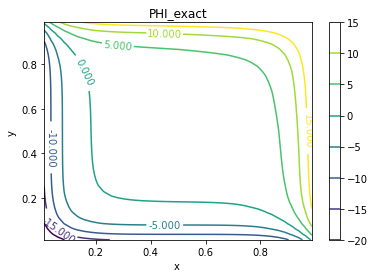

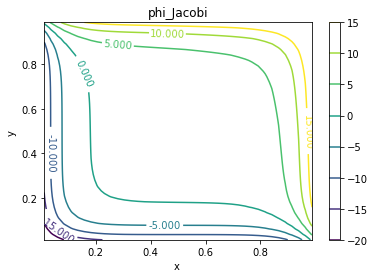

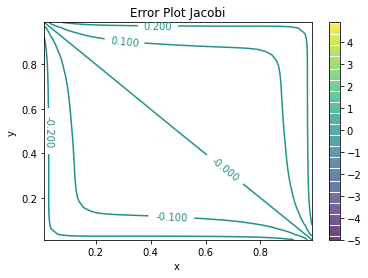

In [5]:
#Jacobi
import numpy
import math
import matplotlib.pyplot as plt
from numpy import linalg as al
#Uniform grids del(x)=del(y)=h
# For NxN grid points
N =int(input("For NxN grid points, enter the value of N = "))
#Including Ghost cells
N= N+2    
h=(1-0)/(N-2)
#Saving Coefficients East=cE, West=cW, North=cN, SouthcS, Centre=cC
cC= -2*(2/h**2)
cW=1/h**2
#Uniform grids
cE=cN=cS=cW 
phi = numpy.zeros(shape=(N,N),dtype=float)
phi1 = numpy.zeros(shape=(N,N),dtype=float)
L= 1
L2_Jacobi=[]
tolerance= 10e-6  #Tolerance
I = 0       #Iteration count
def S(x,y):
    
    return 2*math.sinh(10*(x-0.5)) + 40* (x-0.5)*math.cosh(10*(x-0.5)) \
    + 100*((x-0.5)**2)*math.sinh(10*(x-0.5)) \
    + 2*math.sinh(10*(y-0.5))+40*(y-0.5)*math.cosh(10*(y-0.5)) \
    + 100*((y-0.5)**2)*math.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*math.exp(2*x*y)

BH = lambda y: 0.25* math.sinh(-5) +  math.sinh(10*(y-0.5))*(y-0.5)**2 +1
TH = lambda y: 0.25* math.sinh(5) + (y-0.5)**2 * math.sinh(10*(y-0.5))+math.exp(2*y)
LV = lambda x: 0.25* math.sinh(-5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+1
RV = lambda x: 0.25* math.sinh(5) + (x-0.5)**2 * math.sinh(10*(x-0.5))+math.exp(2*x)
while (L>tolerance):
    
    for j in range(1,N-1):
        for i in range(1,N-1):
            x=h*(i-1/2)
            y=h*(j-1/2)                    
            phi1[i,j]= (S(x,y)-cW*phi[i-1,j]-cS*phi[i,j-1]-cE*phi[i+1,j]-cN*phi[i,j+1])/cC
            

    for i in range(1,N-1):
        phi1[i,0]=2*BH(h*(i-1/2))-phi[i,1]
        phi1[i,N-1]=2*TH(h*(i-1/2))-phi[i,N-2]
    for j in range(1,N-1):
        phi1[0,j]=2*LV(h*(j-1/2))-phi[1,j]
        phi1[N-1,j]=2*RV(h*(j-1/2))-phi[N-2,j]
            
    I=I+1
    L = al.norm(phi[1:N-1,1:N-1]-phi1[1:N-1,1:N-1],2)
    L2_Jacobi.append(L)
    phi=numpy.copy(phi1)
print(L,'\t',I)

#Plot for L2 norm vs Iterations
I = list(range(0,N-5))  
plt.plot(I, L2_Jacobi[2:N-3], color='blue') 
plt.legend(['Jacobi'])
plt.xlabel('No. of iterations')
plt.ylabel('L2 norm')
plt.show()


#Plot for Exact phi
x_g = numpy.linspace(0.5*h, 1-0.5*h, N-2)
y_g = numpy.linspace(0.5*h, 1-0.5*h, N-2)
x, y = numpy.meshgrid(x_g, y_g)
PHI_exact = (x-0.5)**2*numpy.sinh(10*(x-0.5))+(y-0.5)**2*numpy.sinh(10*(y-0.5))+numpy.exp(2*x*y)
fig,ax=plt.subplots(1,1)
levels = numpy.arange(-20,20,5)
cp = ax.contour(x, y, PHI_exact,levels=levels)
ax.clabel(cp, inline=True,fontsize=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('PHI_exact')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()
  
#Plot for phi using Jacobi

PHI_j = phi1[1:N-1,1:N-1]
fig,ax=plt.subplots(1,1)
levels = numpy.arange(-20,20,5)
cp = ax.contour(x, y, PHI_j,levels=levels)
ax.clabel(cp, inline=True,fontsize=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('phi_Jacobi')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show() 
#Plot for Error using Jacobi    
Error_J = PHI_exact- PHI_j
fig,ax=plt.subplots(1,1)
lev = numpy.arange(-5,5,0.1)
ploterr = ax.contour(x, y, Error_J,levels=lev)
fig.colorbar(ploterr )
ax.clabel(ploterr, inline=True,fontsize=10)
plt.title('Error Plot Jacobi')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show() 